## **Import Statements**

In [ ]:
pip install PySastrawi

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 210 kB 4.4 MB/s 


In [ ]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
import numpy as np
import pandas as pd
from sklearn import preprocessing
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import train_test_split, KFold
from nltk.corpus import stopwords
#from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
import json
import matplotlib
from matplotlib import pyplot as plt
# import seaborn as sns
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

# **Loading and inspecting data**

Reading the data

Dataset: https://drive.google.com/file/d/1Gb0dRkWJNceJdpiF1Cl9Yfgn9w2efeWj/view?usp=share_link

In [ ]:
data = pd.read_csv("kumpresep_bahan.csv", delimiter=';')

Displaying the head of the data

In [ ]:
data

,id,text,asal_pempek,url
0,1,500 gr daging ikan tenggiri 600 gr tepung tapi...,Palembang,https://www.viva.co.id/gaya-hidup/kuliner/1485...
1,2,125 gr tepung terigu 250 gr tepung sagu 3 sdm ...,Palembang,https://www.viva.co.id/gaya-hidup/kuliner/1485...
2,3,250 ml putih telur 125 gr tepung tapioka 1/2 s...,Palembang,https://www.viva.co.id/gaya-hidup/kuliner/1485...
3,4,1 kg daging ikan tenggiri giling 650 gram tepu...,Palembang,https://www.viva.co.id/gaya-hidup/kuliner/1485...
4,5,Bahan adonan pempek: 500 gr daging ikan tenggi...,Palembang,https://www.viva.co.id/gaya-hidup/kuliner/1485...
5,6,"0,5 kg Ikan tenggiri giling 300 gram sagu secu...",Bangka,https://cookpad.com/id/resep/15363024-pempek-b...
6,7,"1/2 kg ikan, saya Pakai Ikan Kakap, Haluskan 3...",Bangka,https://cookpad.com/id/resep/15540162-pempek-b...
7,8,Secukupnya Baso Udang Secukupnya minyak goreng...,Bangka,https://cookpad.com/id/resep/16039341-pempek-u...
8,9,500 gr daging tenggiri giling 380 ml air 450 g...,Bangka,https://cookpad.com/id/resep/12352974-pempek-b...
9,10,250 gram fillet ikan tenggiri 225 gram tepung ...,Bangka,https://www.merdeka.com/gaya/resep-pempek-rebu...


Shape of the data

In [ ]:
data.shape

(15, 4)

# **Feature Engineering**

## **Removing punctuations**

**Funtion to remove punctuation**

In [ ]:
def remove_punctuation(text):
    '''a function for removing punctuation'''
    import string
    # replacing the punctuations with an empty space,
    # which in effect deletes the punctuation marks
    translator = str.maketrans(string.punctuation, ' '*len(string.punctuation))
    # return the text stripped of punctuation marks
    return text.translate(translator)

**Apply the function to each examples**

In [ ]:
data['text'] = data['text'].apply(remove_punctuation)
data

,id,text,asal_pempek,url
0,1,500 gr daging ikan tenggiri 600 gr tepung tapi...,Palembang,https://www.viva.co.id/gaya-hidup/kuliner/1485...
1,2,125 gr tepung terigu 250 gr tepung sagu 3 sdm ...,Palembang,https://www.viva.co.id/gaya-hidup/kuliner/1485...
2,3,250 ml putih telur 125 gr tepung tapioka 1 2 s...,Palembang,https://www.viva.co.id/gaya-hidup/kuliner/1485...
3,4,1 kg daging ikan tenggiri giling 650 gram tepu...,Palembang,https://www.viva.co.id/gaya-hidup/kuliner/1485...
4,5,Bahan adonan pempek 500 gr daging ikan tenggi...,Palembang,https://www.viva.co.id/gaya-hidup/kuliner/1485...
5,6,0 5 kg Ikan tenggiri giling 300 gram sagu secu...,Bangka,https://cookpad.com/id/resep/15363024-pempek-b...
6,7,1 2 kg ikan saya Pakai Ikan Kakap Haluskan 3...,Bangka,https://cookpad.com/id/resep/15540162-pempek-b...
7,8,Secukupnya Baso Udang Secukupnya minyak goreng...,Bangka,https://cookpad.com/id/resep/16039341-pempek-u...
8,9,500 gr daging tenggiri giling 380 ml air 450 g...,Bangka,https://cookpad.com/id/resep/12352974-pempek-b...
9,10,250 gram fillet ikan tenggiri 225 gram tepung ...,Bangka,https://www.merdeka.com/gaya/resep-pempek-rebu...


## **Removing stopwords**

**Extract the stop words**

In [ ]:
from copy import copy
# extracting the stopwords from nltk library
sw = stopwords.words('indonesian')

# adding Additional stopwords
sw_new = list(sw)
sw_new.extend(['halus','haluskan','dihaluskan','secukupnya','batang','lembar','panas','bahan','btg','gr','ml','iris','tipis','sdt','sdm',
               'adonan','bumbu','pelengkap','sesuai','selera','rasa', 'bubuk','bh','siung','lbr','gelas','buah','kalau','suka','rasa','bila',
               'blender','btr','kg','sdk','sendok','makan','saya','pakai','ikan','kecil','sedikit','perasan','giling','merebus',
               'liter','fillet','tepung','besar','bongkol','daging','ikan','kocok', 'uleg','mendidih','isian','jempol','segenggam','kating',
               'kuah','yang','dipotong','sejumput','jangan','dikupas','seduh', 'segar','rendam','panas','saus'])

# # displaying the stopwords
# sw_new

In [ ]:
print("Number of stopwords: ", len(sw))

Number of stopwords:  758


**Function to remove stopwords**

In [ ]:
def stopwords(text):
    '''a function for removing the stopword'''
    # removing the stop words and lowercasing the selected words
    text = [word.lower() for word in text.split() if word.lower() not in sw_new]
    # joining the list of words with space separator
    return " ".join(text)

**Apply the function to each examples**

In [ ]:
data['text'] = data['text'].apply(stopwords)
data

,id,text,asal_pempek,url
0,1,500 tenggiri 600 tapioka 300 air 1 bawang puti...,Palembang,https://www.viva.co.id/gaya-hidup/kuliner/1485...
1,2,125 terigu 250 sagu 3 beras 1 garam 1 ebi air ...,Palembang,https://www.viva.co.id/gaya-hidup/kuliner/1485...
2,3,250 putih telur 125 tapioka 1 2 minyak 1 2 gar...,Palembang,https://www.viva.co.id/gaya-hidup/kuliner/1485...
3,4,1 tenggiri 650 gram sagu 2 bawang putih 2 buti...,Palembang,https://www.viva.co.id/gaya-hidup/kuliner/1485...
4,5,pempek 500 tenggiri 400 air es 27 garam 13 pen...,Palembang,https://www.viva.co.id/gaya-hidup/kuliner/1485...
5,6,0 5 tenggiri 300 gram sagu air 1 kaldu kamur 1...,Bangka,https://cookpad.com/id/resep/15363024-pempek-b...
6,7,1 2 kakap 300 sagu tani 1 telor 3 bawang putih...,Bangka,https://cookpad.com/id/resep/15540162-pempek-b...
7,8,baso udang minyak goreng cuko cabai rawit caba...,Bangka,https://cookpad.com/id/resep/16039341-pempek-u...
8,9,500 tenggiri 380 air 450 sagu tani 2 3 bawang ...,Bangka,https://cookpad.com/id/resep/12352974-pempek-b...
9,10,250 gram tenggiri 225 gram sagu 190 air es 2 b...,Bangka,https://www.merdeka.com/gaya/resep-pempek-rebu...


# **Text Analytics**

After removing Punctuations & Stopwords, we will directly perform Text Analytics.

**Lemmatization / stemming is not performed** because the recipe ingredient texts mostly only contain nouns, instead of verbs. Therefore, there will be almost *no difference* even after changing the words to their base forms.

## **Top Words**

### using ***CountVectorizer***

literally just *counting* word frequency

In [ ]:
def using_countvectorizer(text):
  count_vectorizer = CountVectorizer()
  count_vectorizer.fit(text)

  dictionary = count_vectorizer.vocabulary_.items()

  vocab = []
  count = []

  for key, value in dictionary:
    vocab.append(key)
    count.append(value)

  return pd.DataFrame({'vocab':vocab, 'count':count}).sort_values('count',ascending=False)

In [ ]:
# counting words for ALL TEXTS
countvec_vocab_all_text = using_countvectorizer(data['text'])

# counting words for EACH RECIPE
countvec_vocab_jambi = using_countvectorizer(data['text'].loc[data['asal_pempek']=='Jambi'])
countvec_vocab_palemb= using_countvectorizer(data['text'].loc[data['asal_pempek']=='Palembang'])
countvec_vocab_bangka= using_countvectorizer(data['text'].loc[data['asal_pempek']=='Bangka'])

### using ***TF-IDF***

TF(t) = **1 + log[ (Number of times term t appears in a document) / (Total number of terms in the document) ].**

IDF(t) = log_e(Total number of documents / Number of documents with term t in it).

In [ ]:
def using_tfidfvectorizer(text):
  tfid_vectorizer = TfidfVectorizer(stop_words=sw_new, sublinear_tf=True)
  tfid_vectorizer.fit(text)

  dictionary = tfid_vectorizer.vocabulary_.items()

  vocab = []
  count = []

  for key, value in dictionary:
    vocab.append(key)
    count.append(value)

  return pd.DataFrame({'vocab':vocab, 'count':count}).sort_values('count',ascending=False)

In [ ]:
# counting words for ALL TEXTS
tfidf_vocab_all_text = using_tfidfvectorizer(data['text'])

# counting words for EACH RECIPE
tfidf_vocab_jambi = using_tfidfvectorizer(data['text'].loc[data['asal_pempek']=='Jambi'])
tfidf_vocab_palemb= using_tfidfvectorizer(data['text'].loc[data['asal_pempek']=='Palembang'])
tfidf_vocab_bangka= using_tfidfvectorizer(data['text'].loc[data['asal_pempek']=='Bangka'])

/usr/local/lib/python3.7/dist-packages/sklearn/feature_extraction/text.py:401: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['baiknya', 'berkali', 'kali', 'kurangnya', 'mata', 'olah', 'sekurang', 'setidak', 'tama', 'tidaknya'] not in stop_words.
  % sorted(inconsistent)


### ***visualization*** of Top Words

In [ ]:
def plot_top_words(subplotindex,data,text):
  plt.subplot(4,2,subplotindex).title.set_text(text)
  plt.barh('vocab', 'count',data=data.head(20))
  plt.gca().invert_yaxis()

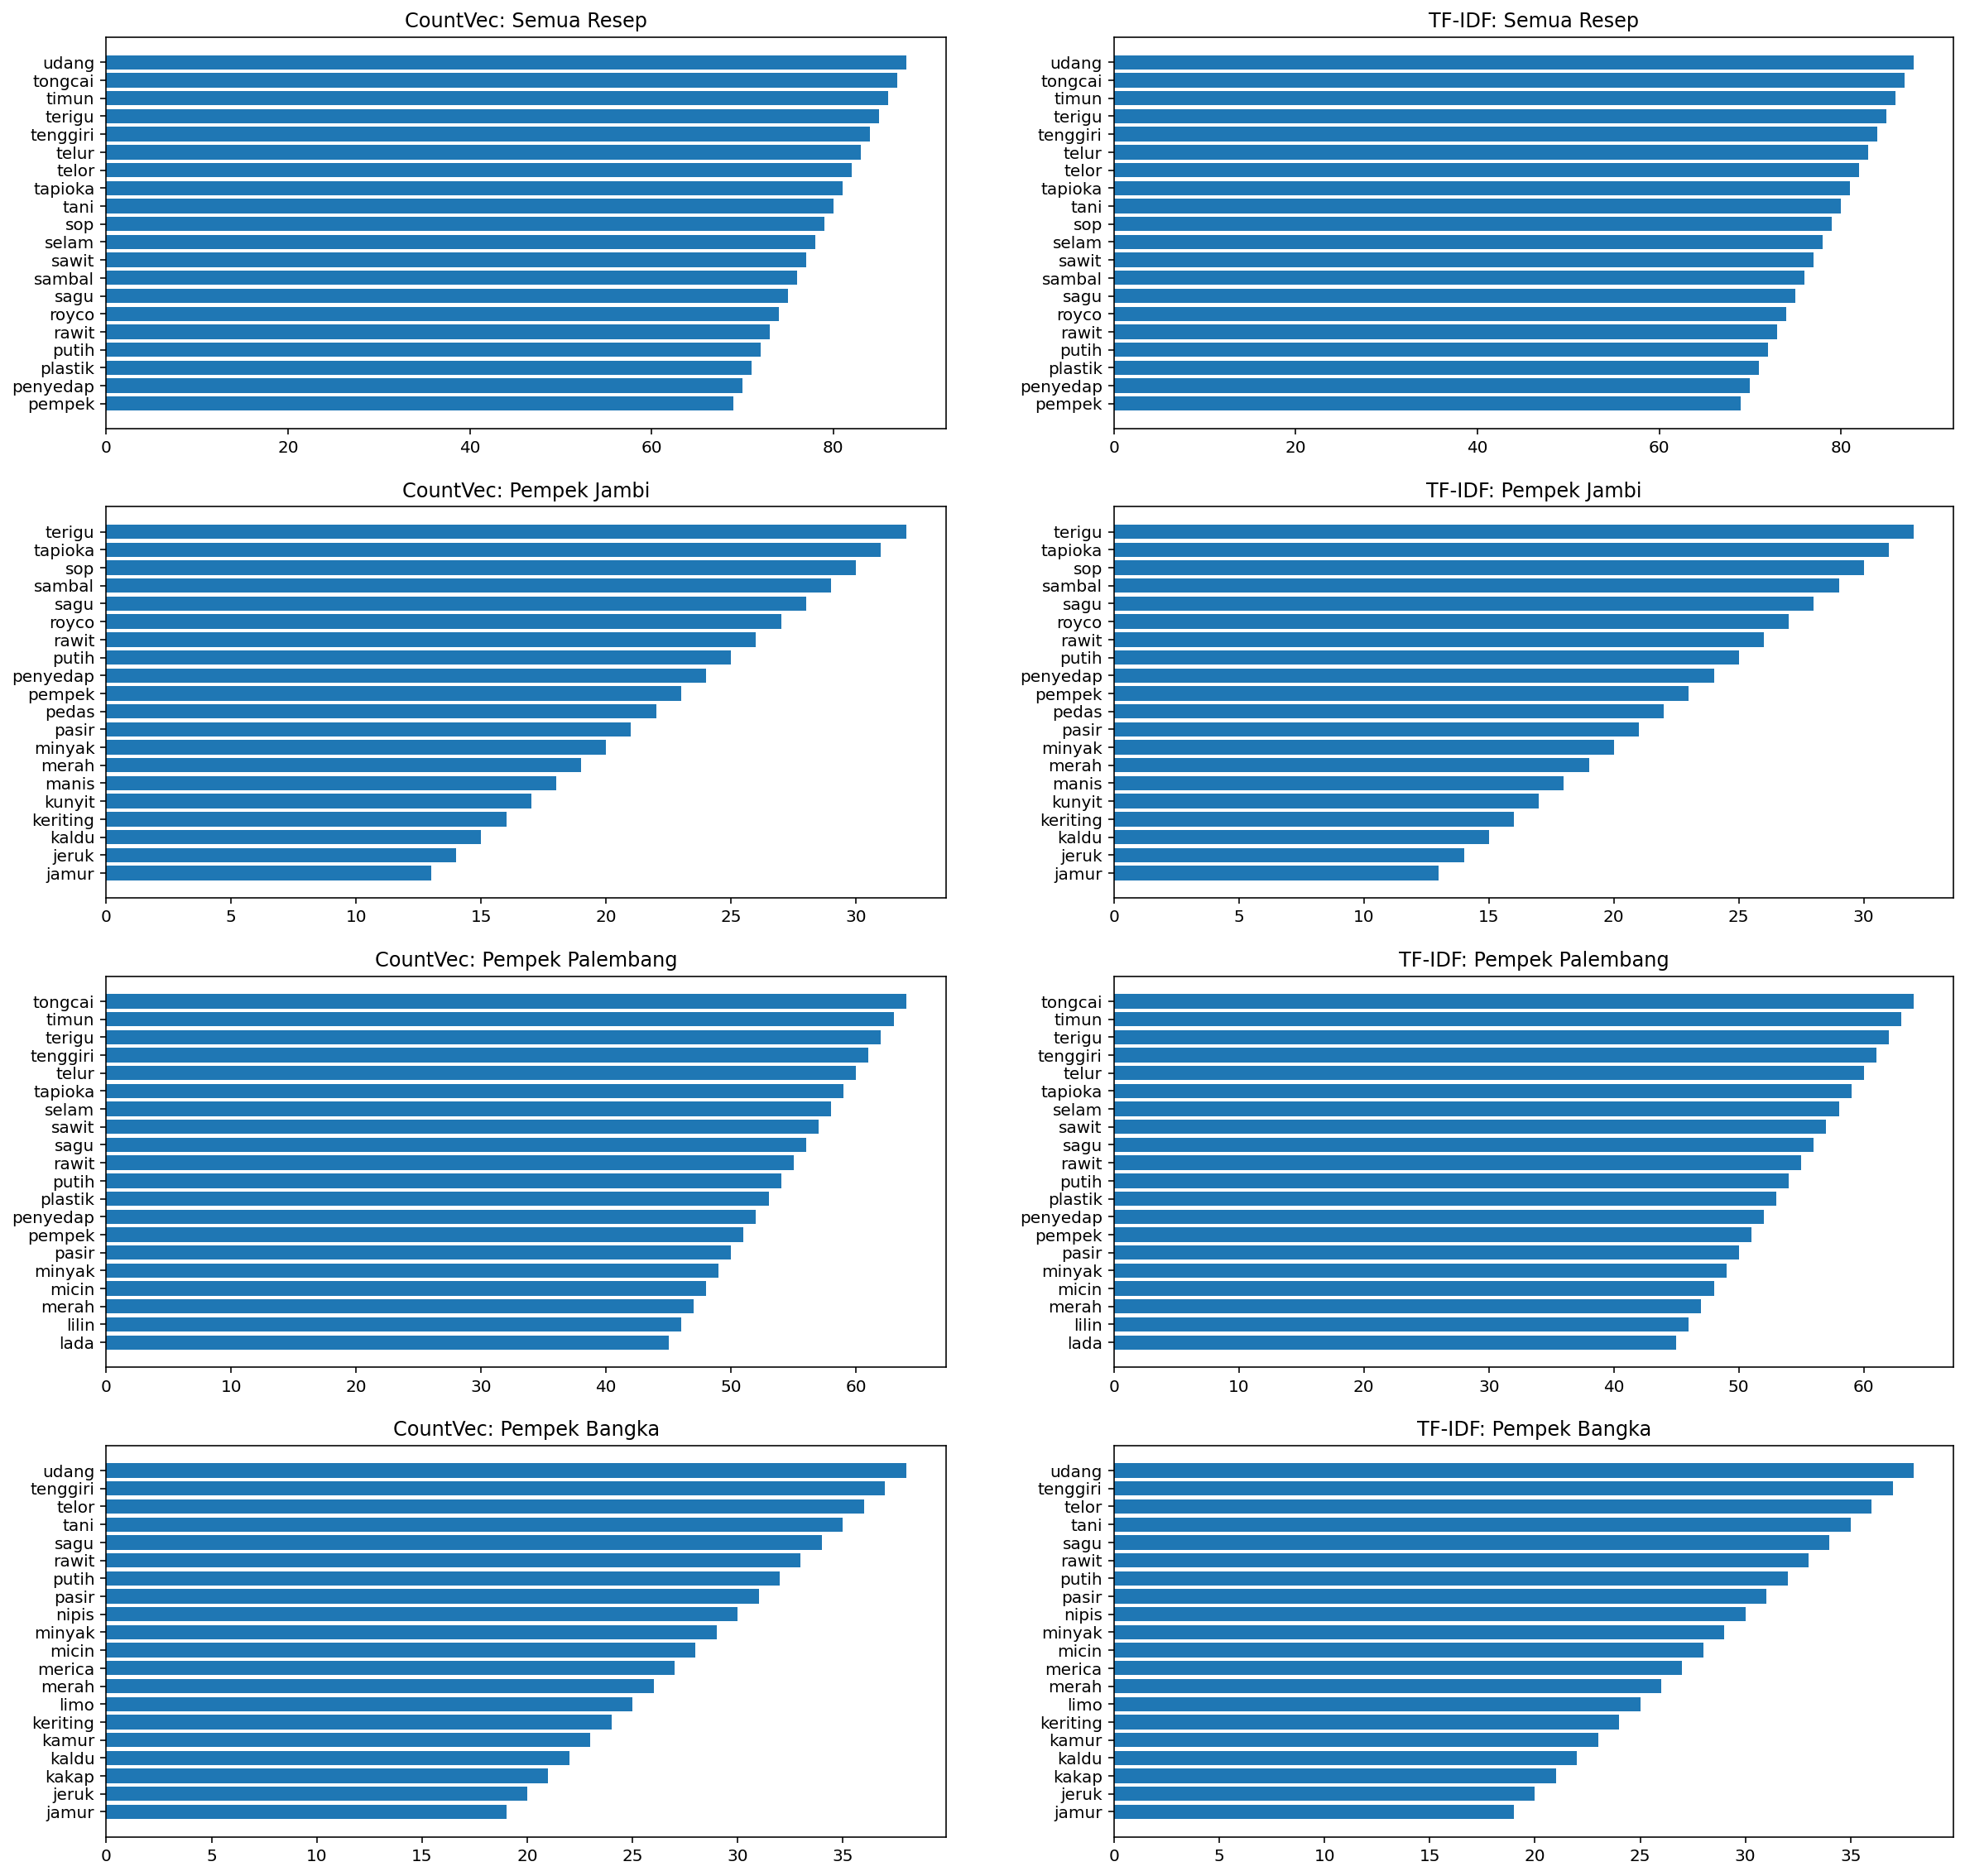

In [ ]:
# visualizing Top Words result of CountVectorizer

plt.figure(figsize=(20,20))

plot_top_words(1, countvec_vocab_all_text, 'CountVec: Semua Resep')
plot_top_words(3, countvec_vocab_jambi, 'CountVec: Pempek Jambi')
plot_top_words(5, countvec_vocab_palemb, 'CountVec: Pempek Palembang')
plot_top_words(7, countvec_vocab_bangka, 'CountVec: Pempek Bangka')

# visualizing Top Words result of TF-IDF Vectorizer

plot_top_words(2, tfidf_vocab_all_text, 'TF-IDF: Semua Resep')
plot_top_words(4, tfidf_vocab_jambi, 'TF-IDF: Pempek Jambi')
plot_top_words(6, tfidf_vocab_palemb, 'TF-IDF: Pempek Palembang')
plot_top_words(8, tfidf_vocab_bangka, 'TF-IDF: Pempek Bangka')

plt.show()

Turns out there is no difference between CountVectorizer and TF-IDF Vectorizer

Some interesting insights from statistics above:


*   Top 5 words from **Pempek Jambi**: Terigu, Tapioka, Sop, Sambal, Sagu

(a lot of flour kinds and using Sambal is being emphasized here)
*   Top 5 words from **Pempek Palembang**: tongcai, timun, tenggiri, telur

(only this Pempek that uses tongcai, they also use tenggiri with no doubt)
*   Top 5 words from **Pempek Bangka**: udang, tenggiri, telor, tani, sagu

(Pempek Bangka not only uses tenggiri, but also udang)
*   Top 5 words from **all corpus**: udang, tongcai, timun, terigu, tenggiri

(this actually listed the uniques word of each recipe. udang from Pempek Bangka; tongcai & timun from Pempek Palembang; tenggiri from Pempek Bangka & Palembang; terigu from Pempek Jambi



## **Text Similarity**

To compare similarities between 2 documents, we will use Cosine Similarity formula, where:

cos = D1.D2/|D1||D2|

In [ ]:
# Below is the function that we will use to calculate Cosine Similarity
def cosine_sim(text1, text2):
  tfidf_vectorizer = TfidfVectorizer(stop_words=sw_new, sublinear_tf=True)
  tfidf = tfidf_vectorizer.fit_transform([text1, text2])
  return ((tfidf * tfidf.T).A)[0,1]

Take a closer look of how the document comparison process executed

In [ ]:
# This is just one example of document comparisons. Later, we need to compare each recipe with the others.
# Example: Similarity between Resep Pempek Palembang & Pempek Jambi.

tfidf_vectorizer = TfidfVectorizer(stop_words=sw_new, sublinear_tf=True)
tfidf = tfidf_vectorizer.fit_transform([str(data.loc[data['asal_pempek']=='Palembang', 'text'].values),
                                        str(data.loc[data['asal_pempek']=='Jambi', 'text'].values)])
print('TF-IDF of 2 documents being compared:\n', tfidf)

print('\nTransposed TF-IDF of 2 documents being compared:\n',tfidf.T)

print('\nMatrix multiplication to calculate cosine similarity between documents:\n', (tfidf * tfidf.T))

print('\nCosine Similarity Result:\n', (tfidf * tfidf.T).A)

TF-IDF of 2 documents being compared:
   (0, 14)	0.07696228790735815
  (0, 8)	0.1303084807797862
  (0, 0)	0.0547593017168201
  (0, 66)	0.07696228790735815
  (0, 46)	0.07696228790735815
  (0, 1)	0.0547593017168201
  (0, 3)	0.1615140031663949
  (0, 10)	0.07696228790735815
  (0, 16)	0.07696228790735815
  (0, 74)	0.07696228790735815
  (0, 4)	0.07696228790735815
  (0, 22)	0.07696228790735815
  (0, 67)	0.1303084807797862
  (0, 45)	0.1303084807797862
  (0, 58)	0.09271555731126532
  (0, 48)	0.07696228790735815
  (0, 59)	0.09271555731126532
  (0, 18)	0.07696228790735815
  (0, 13)	0.1303084807797862
  (0, 39)	0.1836546736522143
  (0, 20)	0.1303084807797862
  (0, 51)	0.07696228790735815
  (0, 36)	0.1615140031663949
  (0, 60)	0.07696228790735815
  (0, 34)	0.0547593017168201
  :	:
  (1, 49)	0.2629458037307206
  (1, 31)	0.2404602484438695
  (1, 0)	0.18708810500792902
  (1, 1)	0.2207858174246273
  (1, 58)	0.12139307703052228
  (1, 59)	0.12139307703052228
  (1, 34)	0.2436179012246575
  (1, 38)	0.12139

With the same process as stated above, here are the Similarity test results between each recipe

In [ ]:
print('Similarity between Resep Pempek Palembang & Pempek Jambi:', cosine_sim(str(data.loc[data['asal_pempek']=='Palembang', 'text'].values),
                                                                        str(data.loc[data['asal_pempek']=='Jambi', 'text'].values)))

print('Similarity between Resep Pempek Palembang & Pempek Bangka:', cosine_sim(str(data['text'].loc[data['asal_pempek']=='Palembang'].values),
                                                                        str(data['text'].loc[data['asal_pempek']=='Bangka'].values)))

print('Similarity between Resep Pempek Bangka & Pempek Jambi:', cosine_sim(str(data['text'].loc[data['asal_pempek']=='Bangka'].values),
                                                                        str(data['text'].loc[data['asal_pempek']=='Jambi'].values)))

Similarity between Resep Pempek Palembang & Pempek Jambi: 0.45414312716894173
Similarity between Resep Pempek Palembang & Pempek Bangka: 0.519766556805676
Similarity between Resep Pempek Bangka & Pempek Jambi: 0.4803466982016712


Now, we are going to create a Dummy text. We will find which recipe is the most similar to our Dummy text.

In [ ]:
dummy_text = "Tenggiri Udang Tapioka Terigu Air Gula".lower()

print('Similarity of Dummy text and Resep Pempek Palembang:', cosine_sim(dummy_text,
                                                                    str(data.loc[data['asal_pempek']=='Palembang', 'text'].values)))
print('Similarity of Dummy text and Resep Pempek Bangka:', cosine_sim(dummy_text,
                                                                    str(data.loc[data['asal_pempek']=='Bangka', 'text'].values)))
print('Similarity of Dummy text and Resep Pempek Jambi:', cosine_sim(dummy_text,
                                                                    str(data.loc[data['asal_pempek']=='Jambi', 'text'].values)))

Similarity of Dummy text and Resep Pempek Palembang: 0.232391708012669
Similarity of Dummy text and Resep Pempek Bangka: 0.22341927918619414
Similarity of Dummy text and Resep Pempek Jambi: 0.1824794606843483


# ***gajadi dipake***

## **Top words before stemming**

**Collect vocabulary count**

We will not use word counts as feature for NLP since tf-idf is a better metric

In [ ]:
# FITTING COUNT VECTORIZER FULLY TO ALL TEXTS

# create a count vectorizer object
count_vectorizer = CountVectorizer()
# fit the count vectorizer using the text data
count_vectorizer.fit(data['text'])
# collect the vocabulary items used in the vectorizer
dictionary = count_vectorizer.vocabulary_.items()

In [ ]:
# FITTING COUNT VECTORIZER TO EACH RECIPE SEPARATELY

count_vectorizer.fit(data['text'].loc[data['asal_pempek']=='Jambi'])
dictionary_jambi = count_vectorizer.vocabulary_.items()

count_vectorizer.fit(data['text'].loc[data['asal_pempek']=='Palembang'])
dictionary_palemb = count_vectorizer.vocabulary_.items()

count_vectorizer.fit(data['text'].loc[data['asal_pempek']=='Bangka'])
dictionary_bangka = count_vectorizer.vocabulary_.items()

Store the vocab and counts in a pandas dataframe

In [ ]:
# DICTIONARY FULL / ALL TEXTS

# lists to store the vocab and counts
vocab = []
count = []
# iterate through each vocab and count append the value to designated lists
for key, value in dictionary:
    vocab.append(key)
    count.append(value)
# store the count in panadas dataframe with vocab as index
vocab_bef_stem = pd.Series(count, index=vocab)
# sort the dataframe
vocab_bef_stem = vocab_bef_stem.sort_values(ascending=False)

In [ ]:
# DICTIONARY JAMBI

# lists to store the vocab and counts
vocab_jambi = []
count_jambi = []
# iterate through each vocab and count append the value to designated lists
for key, value in dictionary_jambi:
    vocab_jambi.append(key)
    count_jambi.append(value)
# store the count in panadas dataframe with vocab as index
vocab_jambi_bef_stem = pd.Series(count_jambi, index=vocab_jambi)
# sort the dataframe
vocab_jambi_bef_stem = vocab_jambi_bef_stem.sort_values(ascending=False)


# DICTIONARY PALEMBANG

# lists to store the vocab and counts
vocab_palemb = []
count_palemb = []
# iterate through each vocab and count append the value to designated lists
for key, value in dictionary_palemb:
    vocab_palemb.append(key)
    count_palemb.append(value)
# store the count in panadas dataframe with vocab as index
vocab_palemb_bef_stem = pd.Series(count_palemb, index=vocab_palemb)
# sort the dataframe
vocab_palemb_bef_stem = vocab_palemb_bef_stem.sort_values(ascending=False)


# DICTIONARY BANGKA

# lists to store the vocab and counts
vocab_bangka = []
count_bangka = []
# iterate through each vocab and count append the value to designated lists
for key, value in dictionary_bangka:
    vocab_bangka.append(key)
    count_bangka.append(value)
# store the count in panadas dataframe with vocab as index
vocab_bangka_bef_stem = pd.Series(count_bangka, index=vocab_bangka)
# sort the dataframe
vocab_bangka_bef_stem = vocab_bangka_bef_stem.sort_values(ascending=False)

**Bar plot of top words before stemming**

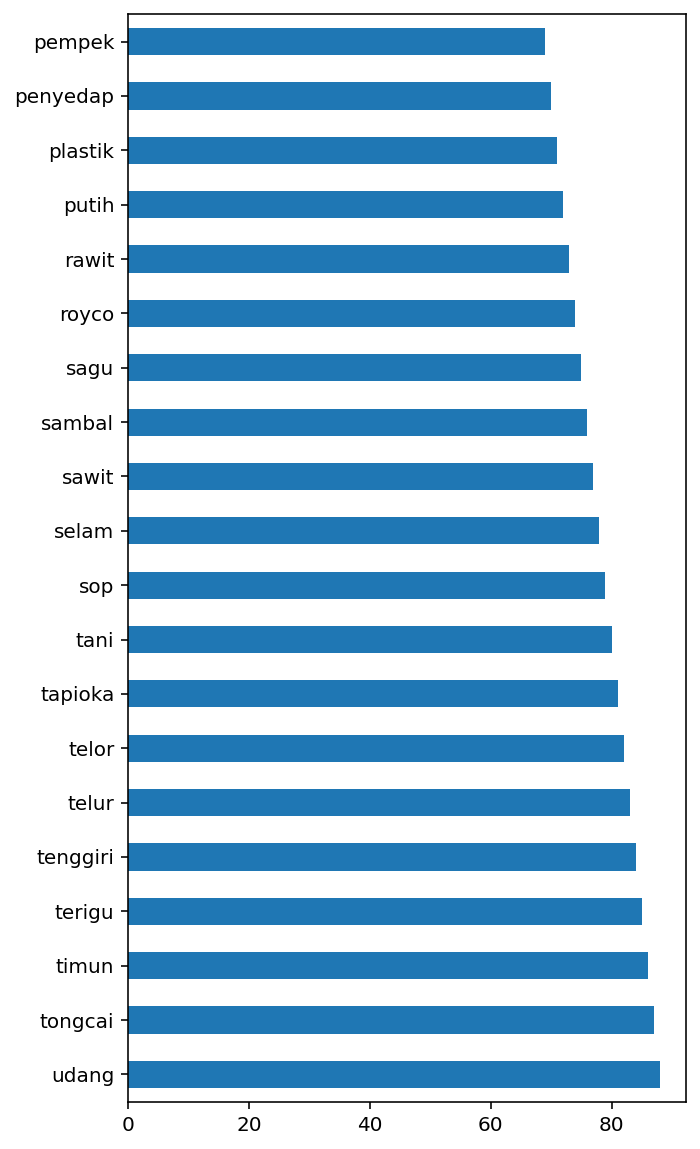

In [ ]:
# TOP WORDS BEFORE STEMMING from ALL TEXTS

top_vacab = vocab_bef_stem.head(20)
top_vacab.plot(kind = 'barh', figsize=(5,10))

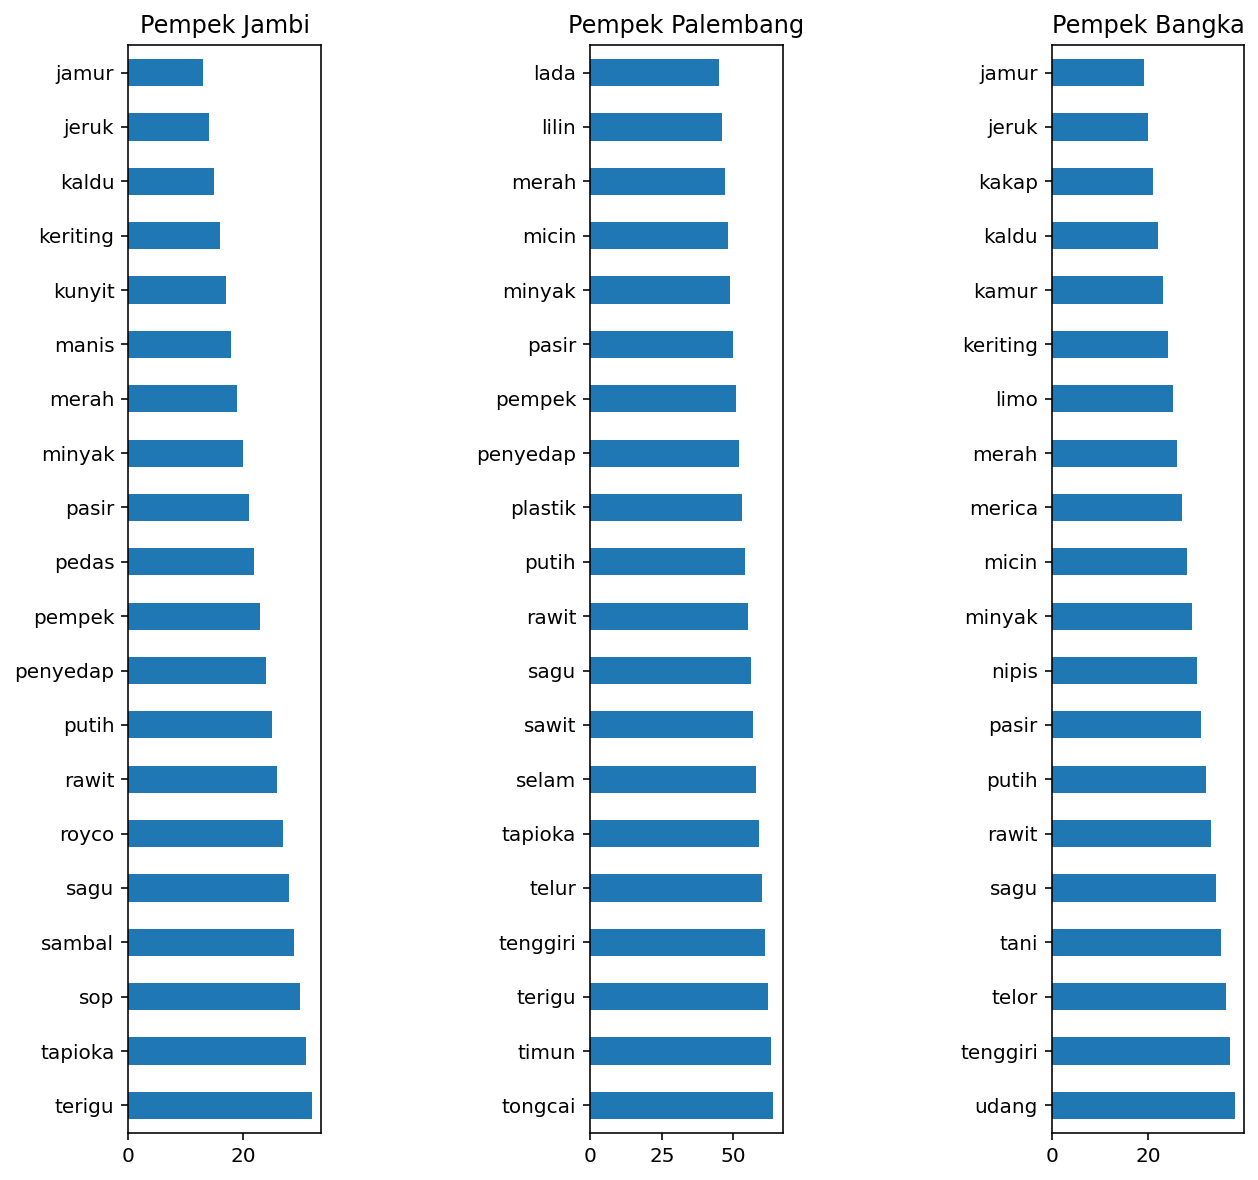

In [ ]:
# TOP WORDS BEFORE STEMMING for EACH RECIPE

top_vocab_jambi = vocab_jambi_bef_stem.head(20)
plt.subplot(1,5,1).title.set_text('Pempek Jambi')
top_vocab_jambi.plot(kind = 'barh', figsize=(10,10))

top_vocab_palemb = vocab_palemb_bef_stem.head(20)
plt.subplot(1,5,3).title.set_text('Pempek Palembang')
top_vocab_palemb.plot(kind = 'barh', figsize=(10,10))

top_vocab_bangka = vocab_bangka_bef_stem.head(20)
plt.subplot(1,5,5).title.set_text('Pempek Bangka')
top_vocab_bangka.plot(kind = 'barh', figsize=(10,10))

plt.show()

##  **Stemming operations**

Stemming operation bundles together words of same root. E.g. stem operation bundles "response" and "respond" into a common "respon"

**A funtion to carry out stemming operation**

In [ ]:
# create an object of stemming function
stemmer = StemmerFactory().create_stemmer()

def stemming(text):
    '''a function which stems each word in the given text'''
    text = [stemmer.stem(word) for word in text.split()]
    return " ".join(text)

**Apply the function to each examples**

In [ ]:
data['text'] = data['text'].apply(stemming)
data

,id,text,asal_pempek,url,jumlah_resep
0,1,resep pempek palembang 1 pempek palembang teng...,Palembang,https://www.viva.co.id/gaya-hidup/kuliner/1485...,5
1,2,resep pempek bangka cuko merah 250 gram tenggi...,Bangka,https://www.merdeka.com/gaya/resep-pempek-rebu...,1
2,3,pempek bangka 500 tenggiri 380 air 450 sagu ta...,Bangka,https://cookpad.com/id/resep/12352974-pempek-b...,1
3,4,pempek udang khas bangka baso udang lihat rese...,Bangka,https://cookpad.com/id/resep/16039341-pempek-u...,1
4,5,pempek bangka 1 2 kakap 300 sagu tani 1 telur ...,Bangka,https://cookpad.com/id/resep/15540162-pempek-b...,1
5,6,pempek bangka 0 5 tenggiri 300 gram sagu air 1...,Bangka,https://cookpad.com/id/resep/15363024-pempek-b...,1
6,7,13 pempek sambal khas jambi pempek 100 sagu 10...,Jambi,https://cookpad.com/id/resep/16152345-13-pempe...,1
7,8,pempek sambal khas jambi pempek 100 sagu 100 t...,Jambi,https://cookpad.com/id/resep/13193015-pempek-s...,1
8,9,41 pempek sambal khas jambi biang 100 teoung t...,Jambi,https://cookpad.com/id/resep/12947116-41-pempe...,1
9,10,pempek sambal khas jambi 100 terigu 100 tapiok...,Jambi,https://cookpad.com/id/resep/12382660-pempek-s...,1


## **Top words after stemming operation**

**Collect vocabulary count using TF-IDF Vectorizer**

tf-idf weight is product of two terms: the first term is the normalized Term Frequency (TF), aka. the number of times a word appears in a document, divided by the total number of words in that document; the second term is the Inverse Document Frequency (IDF), computed as the logarithm of the number of the documents in the corpus divided by the number of documents where the specific term appears.

TF(t) = 1 + log[ (Number of times term t appears in a document) / (Total number of terms in the document) ].

IDF(t) = log_e(Total number of documents / Number of documents with term t in it).

In [ ]:
# FITTING TF-IDF VECTORIZER FULLY TO ALL TEXTS

# create the object of tfid vectorizer
tfid_vectorizer = TfidfVectorizer(stop_words=sw_new, sublinear_tf=True)
# fit the vectorizer using the text data
tfid_vectorizer.fit(data['text'])
# collect the vocabulary items used in the vectorizer
dictionary = tfid_vectorizer.vocabulary_.items()

/usr/local/lib/python3.7/dist-packages/sklearn/feature_extraction/text.py:401: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['baiknya', 'berkali', 'kali', 'kurangnya', 'mata', 'olah', 'sekurang', 'setidak', 'tama', 'tidaknya'] not in stop_words.
  % sorted(inconsistent)


In [ ]:
# FITTING TF-IDF VECTORIZER TO EACH RECIPE SEPARATELY

tfid_vectorizer.fit(data['text'].loc[data['asal_pempek']=='Jambi'])
dictionary_jambi = tfid_vectorizer.vocabulary_.items()

tfid_vectorizer.fit(data['text'].loc[data['asal_pempek']=='Palembang'])
dictionary_palemb = tfid_vectorizer.vocabulary_.items()

tfid_vectorizer.fit(data['text'].loc[data['asal_pempek']=='Bangka'])
dictionary_bangka = tfid_vectorizer.vocabulary_.items()

Store the vocab and tfidfcounts in a pandas dataframe

In [ ]:
# DICTIONARY FULL / ALL TEXTS

# lists to store the vocab and counts
vocab = []
count = []
# iterate through each vocab and count append the value to designated lists
for key, value in dictionary:
    vocab.append(key)
    count.append(value)
# store the count in panadas dataframe with vocab as index
vocab_after_stem = pd.Series(count, index=vocab)
# sort the dataframe
vocab_after_stem = vocab_after_stem.sort_values(ascending=False)
# plot of the top vocab
top_vacab = vocab_after_stem.head(20)

In [ ]:
# DICTIONARY JAMBI

# lists to store the vocab and counts
vocab_jambi = []
count_jambi = []
# iterate through each vocab and count append the value to designated lists
for key, value in dictionary_jambi:
    vocab_jambi.append(key)
    count_jambi.append(value)
# store the count in panadas dataframe with vocab as index
vocab_jambi_after_stem = pd.Series(count_jambi, index=vocab_jambi)
# sort the dataframe
vocab_jambi_after_stem = vocab_jambi_after_stem.sort_values(ascending=False)


# DICTIONARY PALEMBANG

# lists to store the vocab and counts
vocab_palemb = []
count_palemb = []
# iterate through each vocab and count append the value to designated lists
for key, value in dictionary_palemb:
    vocab_palemb.append(key)
    count_palemb.append(value)
# store the count in panadas dataframe with vocab as index
vocab_palemb_after_stem = pd.Series(count_palemb, index=vocab_palemb)
# sort the dataframe
vocab_palemb_after_stem = vocab_palemb_after_stem.sort_values(ascending=False)


# DICTIONARY BANGKA

# lists to store the vocab and counts
vocab_bangka = []
count_bangka = []
# iterate through each vocab and count append the value to designated lists
for key, value in dictionary_bangka:
    vocab_bangka.append(key)
    count_bangka.append(value)
# store the count in panadas dataframe with vocab as index
vocab_bangka_after_stem = pd.Series(count_bangka, index=vocab_bangka)
# sort the dataframe
vocab_bangka_after_stem = vocab_bangka_after_stem.sort_values(ascending=False)

**Bar plot of top words after stemming**

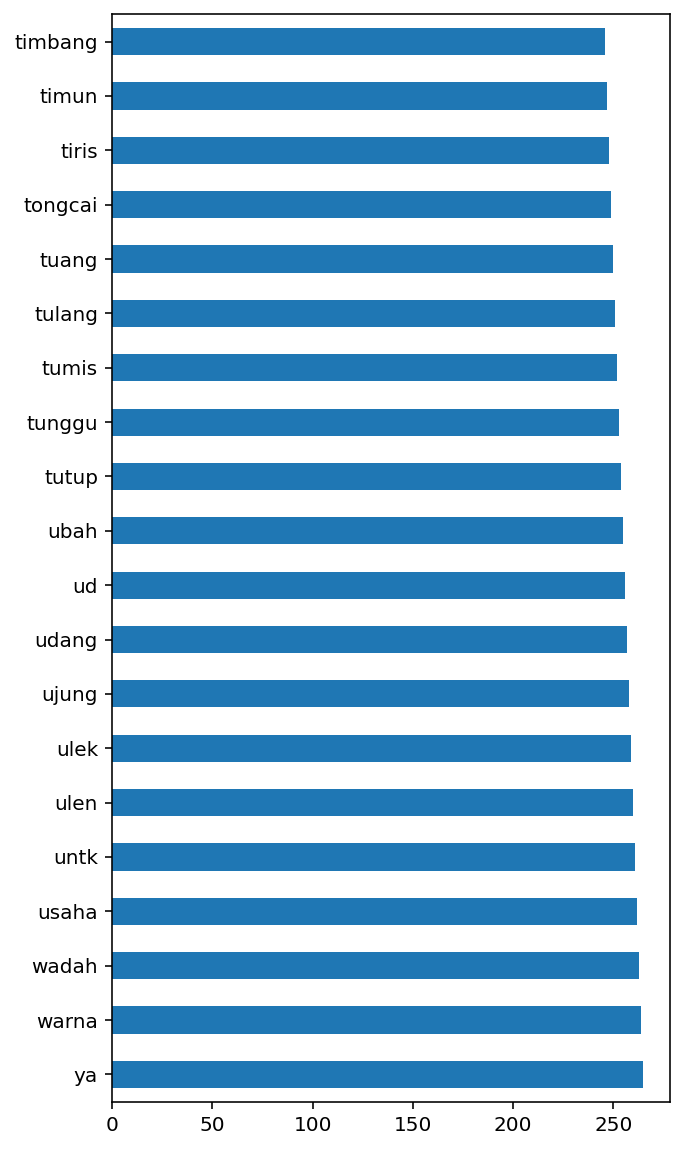

In [ ]:
# TOP WORDS AFTER STEMMING from ALL TEXTS

plt.figure(figsize=(20,8))
top_vacab.plot(kind = 'barh', figsize=(5,10))
plt.show()

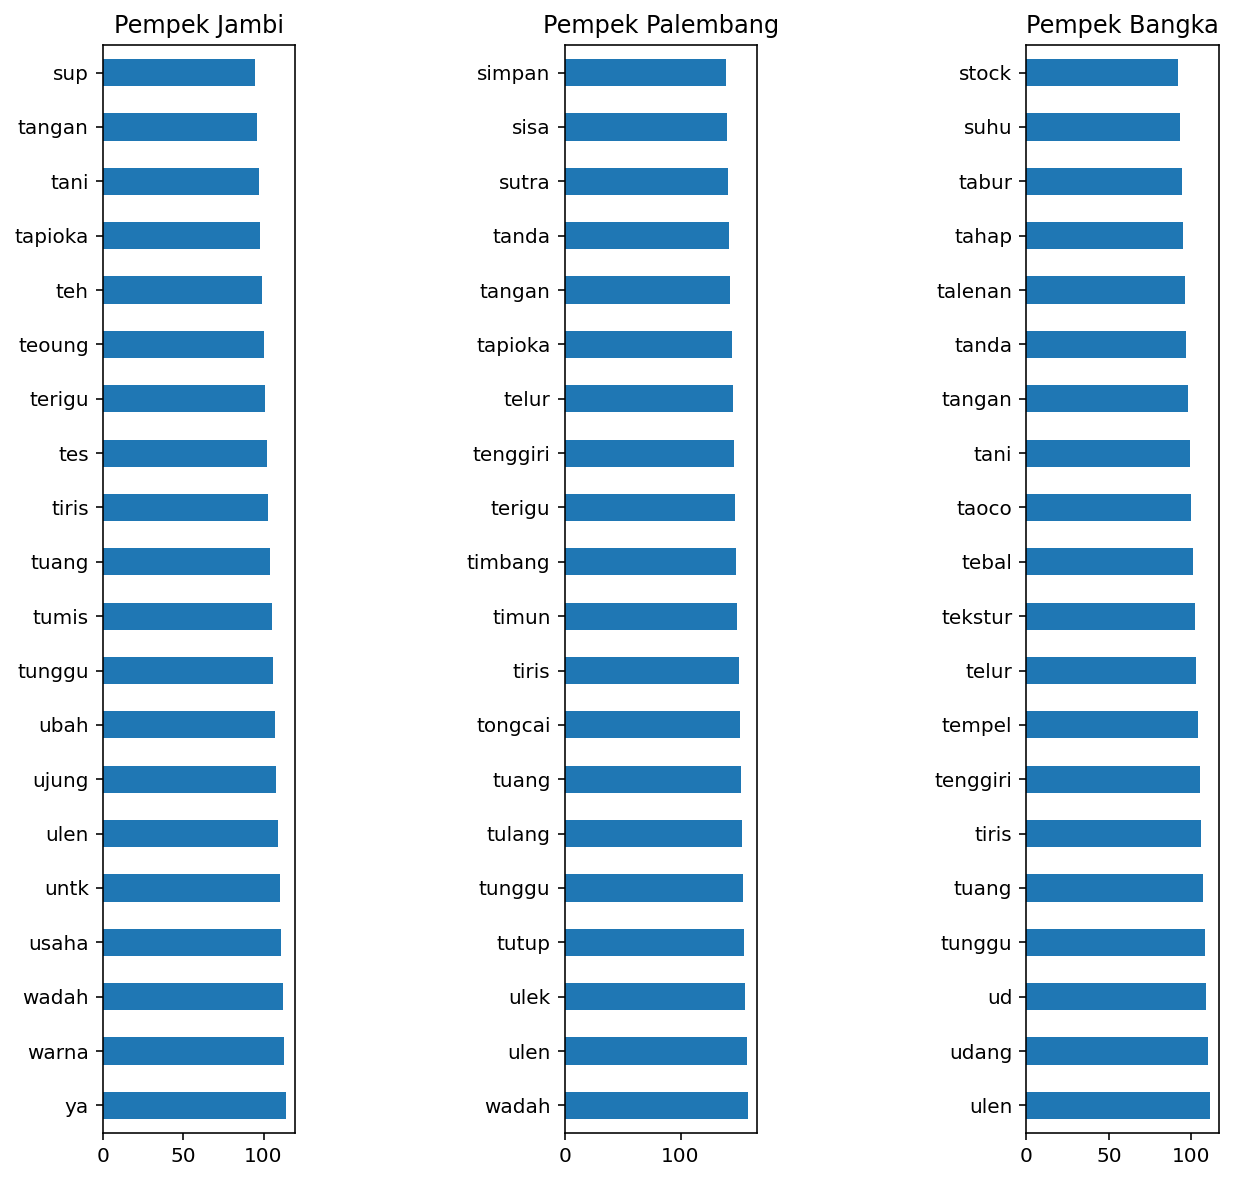

In [ ]:
# TOP WORDS AFTER STEMMING for EACH RECIPE

top_vocab_jambi = vocab_jambi_after_stem.head(20)
plt.subplot(1,5,1).title.set_text('Pempek Jambi')
top_vocab_jambi.plot(kind = 'barh', figsize=(10,10))

top_vocab_palemb = vocab_palemb_after_stem.head(20)
plt.subplot(1,5,3).title.set_text('Pempek Palembang')
top_vocab_palemb.plot(kind = 'barh', figsize=(10,10))

top_vocab_bangka = vocab_bangka_after_stem.head(20)
plt.subplot(1,5,5).title.set_text('Pempek Bangka')
top_vocab_bangka.plot(kind = 'barh', figsize=(10,10))

plt.show()

## **TF-IDF Extraction**

tf-idf weight is product of two terms: the first term is the normalized Term Frequency (TF), aka. the number of times a word appears in a document, divided by the total number of words in that document; the second term is the Inverse Document Frequency (IDF), computed as the logarithm of the number of the documents in the corpus divided by the number of documents where the specific term appears.

TF(t) = (Number of times term t appears in a document) / (Total number of terms in the document).

IDF(t) = log_e(Total number of documents / Number of documents with term t in it).

In [ ]:
# extract the tfid representation matrix of the text data
tfid_matrix = tfid_vectorizer.transform(data['text'])
# collect the tfid matrix in numpy array
array = tfid_matrix.todense()

In [ ]:
# store the tf-idf array into pandas dataframe
df = pd.DataFrame(array)
df.head(10)

,0,1,2,3,4,5,6,7,8,9,...,102,103,104,105,106,107,108,109,110,111
0,0.116208,0.000000,0.000000,0.277306,0.158742,0.000000,0.000000,0.243875,0.0,0.192972,...,0.0,0.357856,0.0,0.163326,0.0,0.0,0.0,0.0,0.000000,0.0
1,0.000000,0.000000,0.000000,0.000000,0.337151,0.000000,0.000000,0.000000,0.0,0.199127,...,0.0,0.000000,0.0,0.279866,0.0,0.0,0.0,0.0,0.000000,0.0
2,0.000000,0.000000,0.000000,0.000000,0.311523,0.000000,0.000000,0.000000,0.0,0.183990,...,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0
3,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.251694,...,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.311968,0.0
4,0.000000,0.000000,0.000000,0.000000,0.000000,0.367001,0.367001,0.367001,0.0,0.296094,...,0.0,0.000000,0.0,0.245785,0.0,0.0,0.0,0.0,0.000000,0.0
5,0.227881,0.227881,0.227881,0.227881,0.000000,0.000000,0.000000,0.000000,0.0,0.227881,...,0.0,0.000000,0.0,0.152615,0.0,0.0,0.0,0.0,0.000000,0.0
6,0.509984,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.243010,...,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0
7,0.457303,0.000000,0.000000,0.270090,0.000000,0.000000,0.000000,0.000000,0.0,0.128700,...,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0
8,0.298932,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.142443,...,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0
9,0.300414,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.143149,...,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0
